In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)
pylab.rcParams['figure.figsize'] = (20, 10)

In [2]:
dataDir='./tsr_ex/project_0/task_0'
#dataType='val2014'
#dataType='train2014'
dataType='default'
#annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
names=[cat['name'] for cat in cats]
print('COCO categories names: \n{}\n'.format(' '.join(names)))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
COCO categories names: 
Stop sign - Oct



k = 407
[{'id': 625, 'image_id': 407, 'category_id': 1, 'segmentation': [], 'area': 5826.566899999996, 'bbox': [906.71, 106.79, 74.69, 78.01], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False, 'track_id': 1127, 'keyframe': True}}, {'id': 626, 'image_id': 407, 'category_id': 1, 'segmentation': [], 'area': 2181.2311999999993, 'bbox': [292.22, 255.16, 47.48, 45.94], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False, 'track_id': 1128, 'keyframe': True}}]


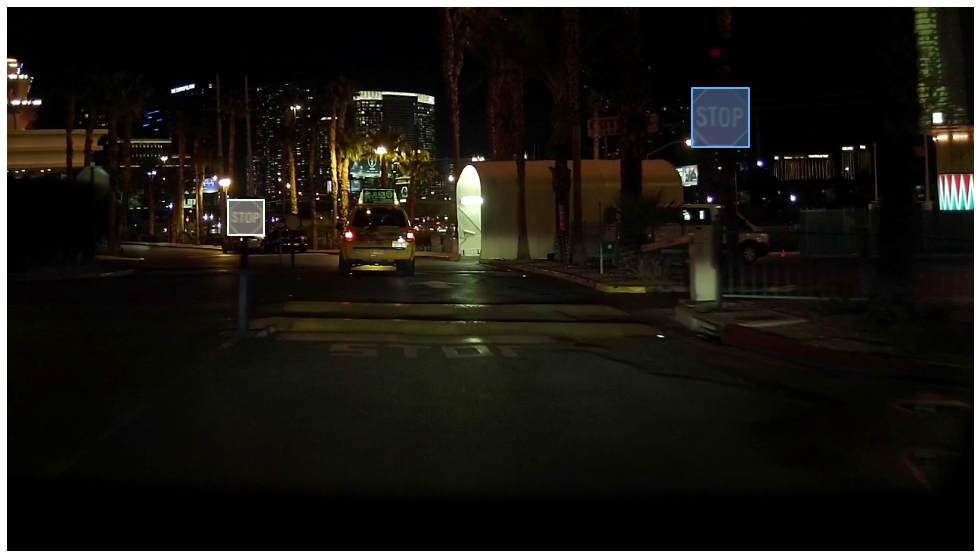

In [6]:
# Select image
k = -1 # if -1, set random
#catIds = coco.getCatIds(catNms=['person','car','stop sign']); 
catIds = coco.getCatIds(catNms=['Stop sign - Oct']); 
imgIds = coco.getImgIds(catIds=catIds);
k = len(imgIds)-1 if k >= len(imgIds) else k
k = np.random.randint(0,len(imgIds)) if k == -1 else k
print('k =',k)
img = coco.loadImgs(imgIds[k])[0]
#img

# load and display image
#I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
#plt.axis('off'); plt.imshow(I); plt.show()

# load and display instance annotations
catIds_ = coco.getCatIds(catNms=['traffic light','stop sign'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
plt.imshow(I); plt.axis('off')
coco.showAnns(anns, draw_bbox=True)

In [15]:
## The end ##